In [3]:
import numpy as np
import pandas as pd
import random
from GPyOpt.methods import BayesianOptimization

Iteration 1
43.54991979968334 242.3007922798535
37.55374793397236
Iteration 2
35.368106451991814 211.28922249107802
108.00773361159546
Iteration 3
52.66403690420768 209.4019077788247
49.71111242015832
Iteration 4
27.98761191566333 212.41655449792063
169.0383666830289
Iteration 5
49.105957893490604 291.66926935995536
62.34079328950631
Iteration 6
47.178327306576556 239.4295967335426
34.42471495839897
Iteration 7
51.57430305950057 246.47524640617263
36.33624711274896
Iteration 8
59.44160256445302 232.6223922460955
58.41247715437699
Iteration 9
45.04292888435298 259.9107101713167
33.98370812651864
Iteration 10
57.62806762785079 264.2411236819608
67.96361613309686
Iteration 11
34.37717523947545 259.1627136720081
61.27433943925847
Iteration 12
46.105719512660166 253.06005695188227
33.184449840727154
Iteration 13
25.0 300.0
107.44786284943207
Iteration 14
75.0 200.0
156.37548429080107
Iteration 15
47.34729910631213 247.09912573372128
32.91626025862831


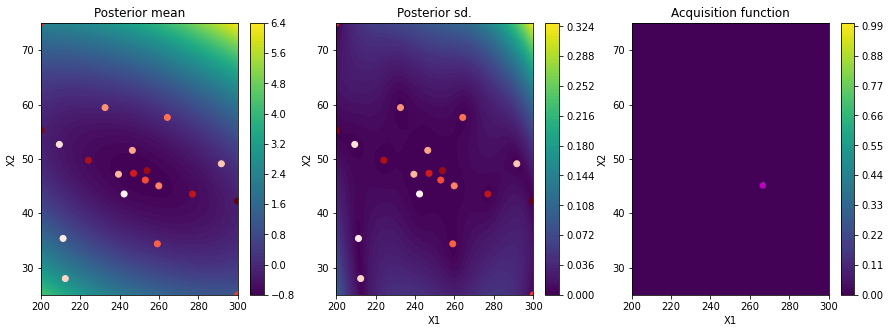

In [203]:
# Using Bayesian Optimization

count = 0

# Define the objective function
def objective_function(x):
    global count
    count+=1
    t = float(input(f"Enter the objective function value for point (r={x[0][1]},c={x[0][0]}): "))
    print("Iteration", count)
    print(x[0][1],x[0][0])
    print(t)
    return t

# Define the bounds of the input space
domains = [{'name': 'c', 'type': 'continuous', 'domain': (200, 300)},
          {'name': 'r', 'type': 'continuous', 'domain': (25, 75)}]

# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(f=objective_function, domain=domains)

optimizer.run_optimization(max_iter=15)

print("="*20)
optimizer.plot_acquisition()

In [204]:
ins = optimizer.get_evaluations()[1].flatten()
outs = optimizer.get_evaluations()[0]
evals = pd.DataFrame({'t':ins, 'c':outs[:,0], 'r':outs[:,1]})
evals

,t,c,r
0,37.553748,242.300792,43.549920
1,108.007734,211.289222,35.368106
2,49.711112,209.401908,52.664037
3,169.038367,212.416554,27.987612
4,62.340793,291.669269,49.105958
5,34.424715,239.429597,47.178327
6,36.336247,246.475246,51.574303
7,58.412477,232.622392,59.441603
8,33.983708,259.910710,45.042929
9,67.963616,264.241124,57.628068


In [251]:
evals.to_csv('evals.csv',index=False)

In [214]:
# To check the robustness of the method we can use a polynomial fit on the data to find the minima
from scipy.optimize import curve_fit

r = evals['r'].values
c = evals['c'].values
t = evals['t'].values

# Define the polynomial function
def poly_func(x, a, b, c, d, e, f,):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[0]*x[1] + f*x[1]**2

# Initial guess for the parameters
initial_guess = [0]*6

# Perform the curve fitting
params, covariance = curve_fit(poly_func, (r, c), t, p0=initial_guess)

# Get the predicted values
predicted_t = poly_func((r, c), *params)


In [215]:
print("Parameters:", params)
print("Predicted values:", predicted_t)

Parameters: [ 2.02200714e+03 -3.39756726e+01 -9.51861488e+00  2.12508210e-01
  5.60641632e-02  1.37469767e-02]
Predicted values: [ 37.72318283 107.66836084  49.95278335 169.23460613  62.2116736
  34.41423675  36.69030272  58.16876305  33.81238881  68.17264057
  61.10096741  32.96728962 107.55762262 156.30892067  32.98717512]


In [216]:
from scipy.optimize import minimize

def f_poly(x):
    return poly_func((x[0],x[1]),*params)

result = minimize(f_poly, (225,25))

In [228]:
print("Minimization through polynomial fit")
print("c=",result.x[1],",","r=",result.x[0],", t=", result.fun)

print("Minimization through bayesian optimization")
print("c=",c[-1],",","r=",r[-1],", t=", t[-1])

Minimization through polynomial fit
c= 250.6096878837069 , r= 46.881549444783346 , t= 32.863375154864684
Minimization through bayesian optimization
c= 247.09912573372128 , r= 47.34729910631213 , t= 32.91626025862831


In [248]:
evals = pd.read_csv('evals.csv')
r = evals['r'].values
c = evals['c'].values
t = evals['t'].values


In [249]:
# Difference between the two methods is very low which verifies the robustness of the method

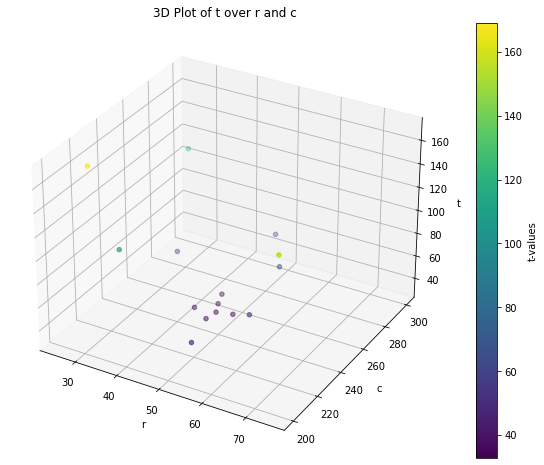

In [250]:
import matplotlib.pyplot as plt

# Create a figure and axis with 3D projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(r, c, t, c=t, cmap='viridis', marker='^')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('t-values')

# Set labels and title
ax.set_xlabel('r')
ax.set_ylabel('c')
ax.set_zlabel('t')
ax.set_title('3D Plot of t over r and c')

# Show the plot
plt.show()

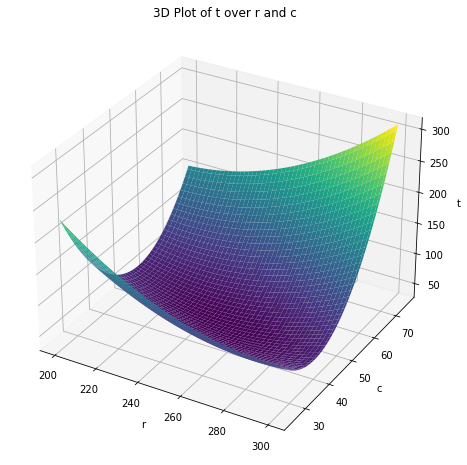

In [252]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for r and c
r_range = np.linspace(25, 75, 100)
c_range = np.linspace(200, 300, 100)

# Create a meshgrid of r and c values
r, c = np.meshgrid(r_range, c_range)

# Calculate the function values for each point on the grid
t_values = f_poly((r, c))

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(c, r, t_values, cmap='viridis')

# Add labels and title
ax.set_xlabel('r')
ax.set_ylabel('c')
ax.set_zlabel('t')
ax.set_title('3D Plot of t over r and c')

# Show the plot
plt.show()

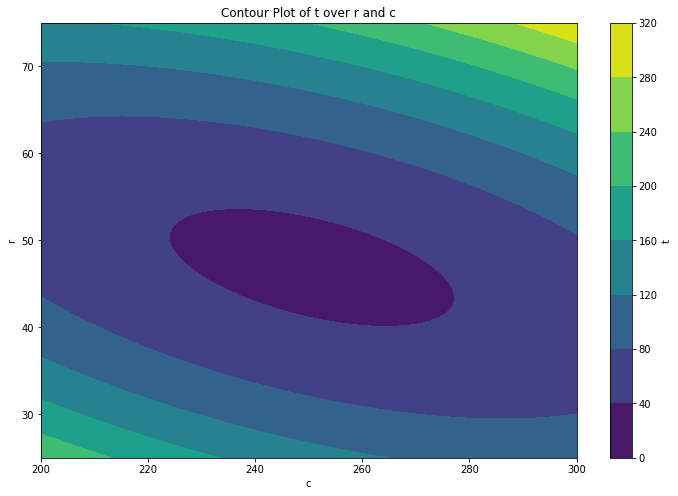

In [253]:
# Contour plot
plt.figure(figsize=(12, 8))
plt.contourf(c, r, t_values, cmap='viridis')
plt.colorbar(label='t')
plt.xlabel('c')
plt.ylabel('r')
plt.title('Contour Plot of t over r and c')
plt.show()
